# Analisis Exploratorio de Datos (EDA) - Satisfaccion de Pasajeros

Este notebook contiene el analisis detallado del dataset de aerolineas para entender que factores influyen en la satisfaccion del cliente.

## 1. Importar librerias y cargar datos

In [10]:
import os
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np


# Gestión de rutas robusta
file_name = 'airline_passenger_satisfaction.csv'
data_path = file_name
if not os.path.exists(data_path):
    # Buscar en carpeta data (estructura local)
    possible_path = os.path.join('..', 'data', file_name)
    if os.path.exists(possible_path):
        data_path = possible_path
    else:
        try:
            from google.colab import files
            print("Sube el archivo:")
            uploaded = files.upload()
            data_path = file_name
        except ImportError:
            print("Error: Archivo no encontrado.")

df = pd.read_csv(data_path)
df.head()


,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


## 2. Inspeccion inicial

In [5]:
print("--- Informacion General ---")
print(df.info())
print("\n--- Valores Faltantes ---")
print(df.isnull().sum()[df.isnull().sum() > 0])

--- Informacion General ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate locati

## 3. Analisis de la Variable Objetivo

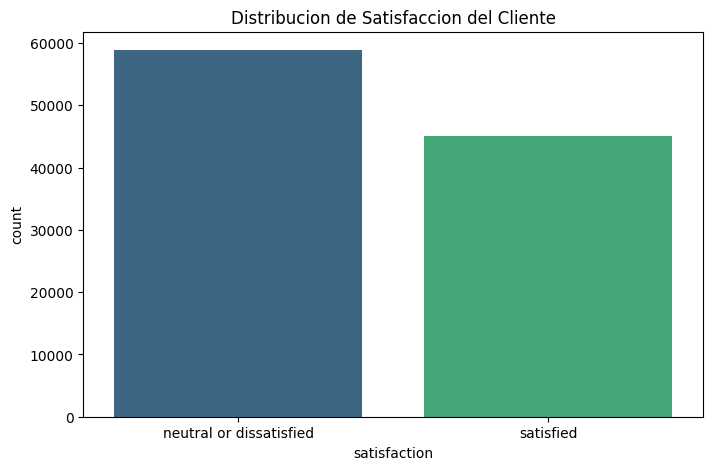

In [8]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='satisfaction', hue='satisfaction', palette='viridis', legend=False)
plt.title('Distribucion de Satisfaccion del Cliente')
plt.show()

## 4. Matriz de Correlacion
Entender que variables estan numericamente ligadas.

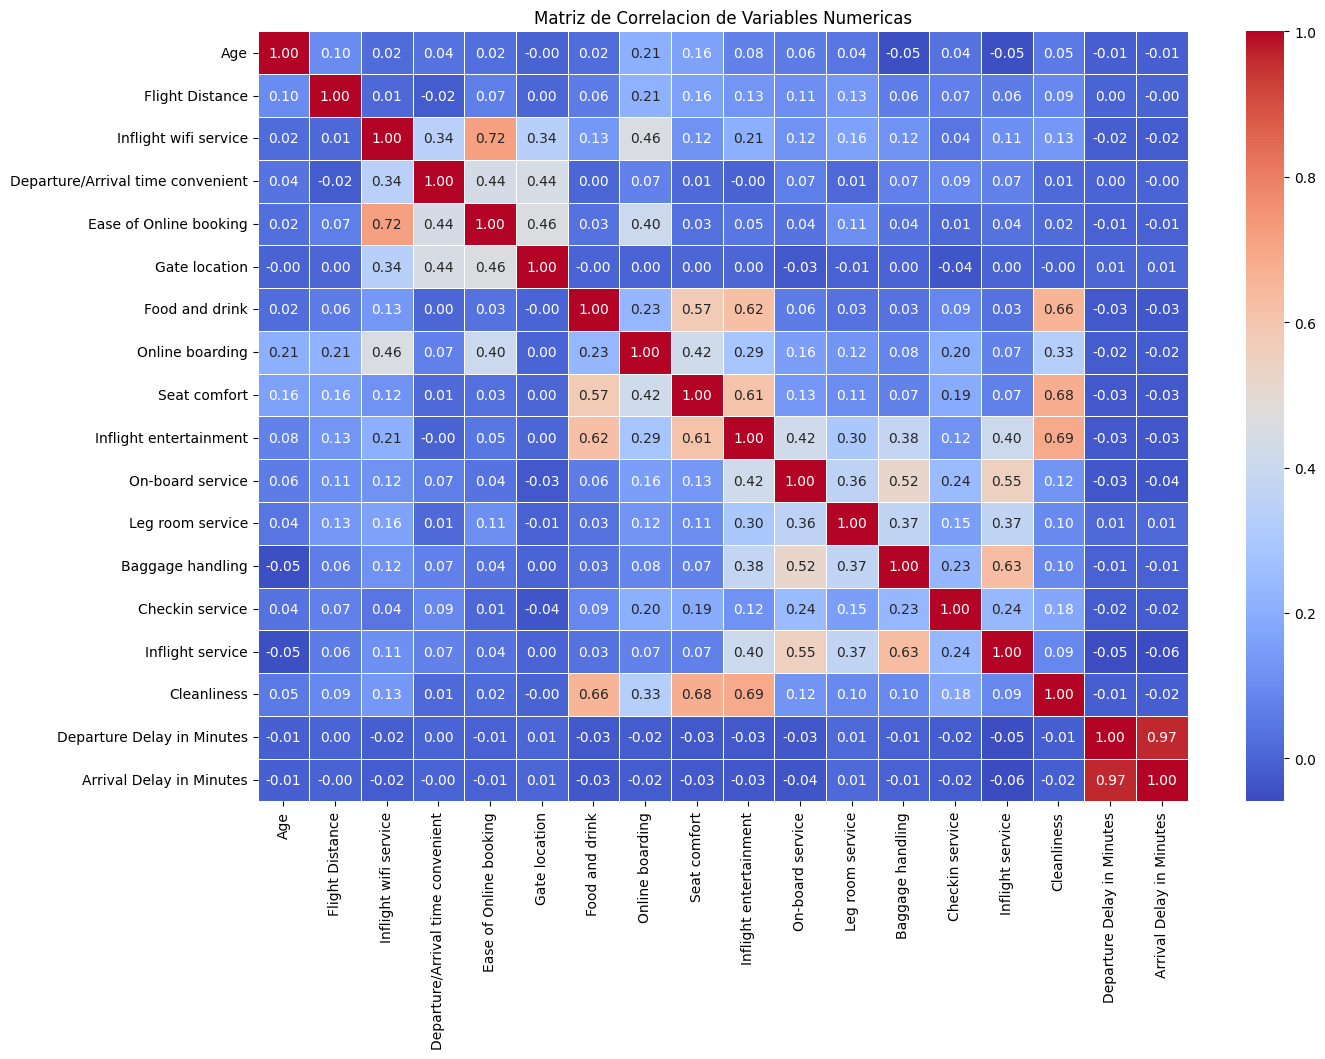

In [11]:
plt.figure(figsize=(15, 10))
numeric_df = df.select_dtypes(include=[np.number]).drop(columns=['Unnamed: 0', 'id'], errors='ignore')
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlacion de Variables Numericas')
plt.show()

## 5. Segmentacion por Clase y Tipo de Viaje

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

sns.countplot(data=df, x='Class', hue='satisfaction', palette='magma', ax=ax[0])
ax[0].set_title('Satisfaccion por Clase de Viaje')

sns.countplot(data=df, x='Type of Travel', hue='satisfaction', palette='rocket', ax=ax[1])
ax[1].set_title('Satisfaccion por Tipo de Viaje')

plt.show()

## 6. Impacto de los servicios especificos
Analicemos el WiFi y el Entretenimiento, que suelen ser claves.

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

sns.boxplot(data=df, x='satisfaction', y='Inflight wifi service', palette='Set2', ax=ax[0], hue='satisfaction', legend=False)
ax[0].set_title('Servicio WiFi vs Satisfaccion')

sns.boxplot(data=df, x='satisfaction', y='Inflight entertainment', palette='Set3', ax=ax[1], hue='satisfaction', legend=False)
ax[1].set_title('Entretenimiento a bordo vs Satisfaccion')

plt.show()

## 7. Analisis de Retrasos

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Departure Delay in Minutes', y='Arrival Delay in Minutes', hue='satisfaction', alpha=0.5)
plt.title('Relacion entre Retrasos de Salida y Llegada')
plt.show()